<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Spam_classification_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
df = pd.read_csv('emails.csv')

# Drop the first column
df = df.drop('Email No.', axis=1)

# Remove NaN values
df.dropna(inplace=True)

# Replace missing values with the average
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display before and after processing
# print("Original DataFrame:")
# print(df.head())
# print("\nDataFrame after processing:")
# print(df_imputed.head())

# Display shape
num_samples, num_features = df_imputed.shape
print(f"Number of rows (samples): {num_samples}")
print(f"Number of columns (features): {num_features}")

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

Number of rows (samples): 5172
Number of columns (features): 3001


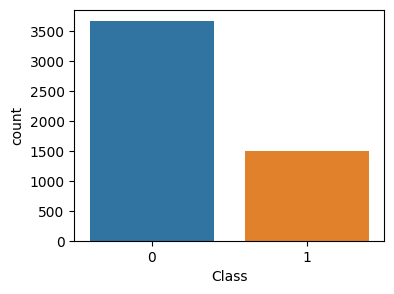

In [101]:
plt.figure(figsize=(4,3))
# Calculate the number of classes in the class
sns.countplot(data=df, x='Class')
plt.savefig('classes.png')

**Training and Testing data set**

In [102]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
df_selected = selector.fit_transform(df_scaled, df['Class'])

# Get feature names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = df_scaled.columns[selected_feature_indices]

# Display selected feature names as a dataframe
selected_feature_names_df = pd.DataFrame({'Selected Feature Name': selected_feature_names})

print("Selected Feature Names:")
selected_feature_names_df.T

Selected Feature Names:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Selected Feature Name,hpl,our,forwarded,daren,attached,more,thanks,money,best,subject,able,hanks,soft,thank,sex,sec,dr,mo,hp,ur


In [103]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_selected, df['Class'], test_size=0.2, random_state=42)

# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# define undersample strategy
undersample = RandomOverSampler(sampling_strategy='not majority')
X_train, y_train = undersample.fit_resample(X_train,y_train)

In [104]:
df_selected.shape

(5172, 20)

In [105]:
X_train.shape

(5866, 20)

In [106]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# K-Nearest Neighbors (KNN) model with parameter tuning
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3)
knn_grid.fit(X_train, y_train)
best_knn_model = knn_grid.best_estimator_

# Adaboost model with parameter tuning
adaboost_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost_model = AdaBoostClassifier()
adaboost_grid = GridSearchCV(adaboost_model, adaboost_param_grid, cv=3)
adaboost_grid.fit(X_train, y_train)
best_adaboost_model = adaboost_grid.best_estimator_

# Logistic Regression model with parameter tuning
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0]}
logreg_model = LogisticRegression(max_iter=1000)
logreg_grid = GridSearchCV(logreg_model, logreg_param_grid, cv=3)
logreg_grid.fit(X_train, y_train)
best_logreg_model = logreg_grid.best_estimator_

# Display the best parameters for each model
print("Best KNN Model Parameters:", best_knn_model)
print("Best Adaboost Model Parameters:", best_adaboost_model)
print("Best Logistic Regression Model Parameters:", best_logreg_model)

Best KNN Model Parameters: KNeighborsClassifier(n_neighbors=9, weights='distance')
Best Adaboost Model Parameters: AdaBoostClassifier(n_estimators=150)
Best Logistic Regression Model Parameters: LogisticRegression(C=10.0, max_iter=1000)


In [107]:
# Classification models
knn_model = KNeighborsClassifier(n_neighbors=9, weights='distance')
adaboost_model = AdaBoostClassifier(n_estimators=150)
logreg_model = LogisticRegression(C=10.0, max_iter=1000)

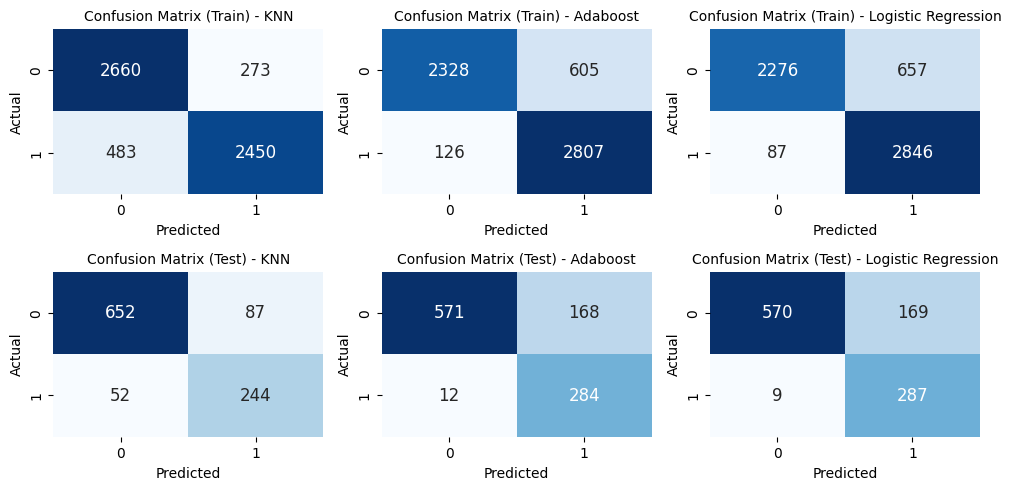

In [108]:
# Confusion matrix and performance metrics
plt.figure(figsize=(10, 7))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix for training
    plt.subplot(3, 3, i)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})  # Increase font size
    plt.title(f'Confusion Matrix (Train) - {name}', fontsize = 10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plot confusion matrix for testing
    plt.subplot(3, 3, i + 3)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})  # Increase font size
    plt.title(f'Confusion Matrix (Test) - {name}', fontsize = 10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # ... (rest of the metrics collection code)

plt.tight_layout()

# Save the confusion matrix plot
plt.savefig('confusion_matrix_plot.png')

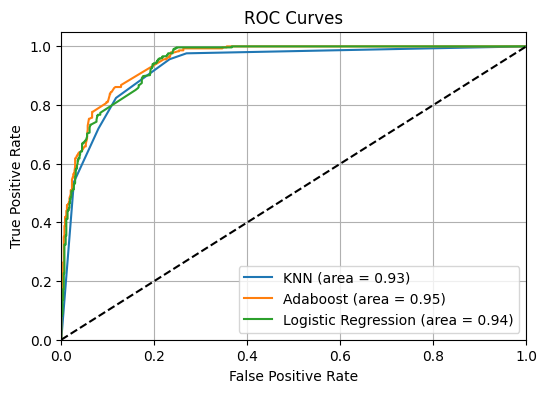

In [109]:
# ...

# Calculate and store ROC data for the three algorithms
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plot ROC curves for the three algorithms in one plot
plt.figure(figsize=(6, 4))
for name, roc in roc_data.items():
    plt.plot(roc['fpr'], roc['tpr'], label=f'{name} (area = {roc["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid()

# Save the ROC plot
plt.savefig('roc_plot.png')

# Show the ROC plot
plt.show()

# ...


In [111]:
# ...

# Calculate and store performance metrics for the three algorithms
accuracy_metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    accuracy_metrics.append({
        'Algorithm': name,
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    })

# Convert the metrics to a DataFrame
accuracy_metrics_df = pd.DataFrame(accuracy_metrics)

# Display the accuracy metrics DataFrame
print("Accuracy Metrics:")
accuracy_metrics_df.T


# ...


Accuracy Metrics:


,0,1,2
Algorithm,KNN,Adaboost,Logistic Regression
Train Accuracy,0.871122,0.875384,0.873167
Train Precision,0.899743,0.822685,0.812446
Train Recall,0.835322,0.957041,0.970338
Train F1,0.866337,0.884791,0.8844
Test Accuracy,0.8657,0.826087,0.828019
Test Precision,0.73716,0.628319,0.629386
Test Recall,0.824324,0.959459,0.969595
Test F1,0.778309,0.759358,0.763298
